In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.set_option("display.max_rows", 5)
plt.rc('font', family='serif')

In [39]:
dir = os.getcwd()
byDistrict_path = os.path.join(dir,"byDistrict")
byRegion_path = os.path.join(dir,"byRegion")
byStation_path = os.path.join(dir,"byStation")
byStationByYear_path = os.path.join(dir,"byStationByYear")
bySubregion_path = os.path.join(dir,"bySubregion")

In [40]:
#SPECS TO READ SUMMARY DATA
#The station format is abit different than other data format because they have std_pre
byStation_format = '%10s%10.4f%10.4f%10.4f%10.2f%10.2f%10.4f'
byStation_specs = [(0,10),(10,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80)]
byStation_cols = ["year","mean_tmin","mean_tmax","mean_pre", "sum_pre", "min_tmin", "max_tmax","std_pre"]

In [41]:
#SPECS TO READ DISTRICT DATA
#THe format of region, subregion, and country is similar to district format
byDistrict_format = '%10d%10.4f%10.4f%10.4f%10.2f%10.2f%10.2f'
byDistrict_specs = [(0,10),(10,20),(20,30),(30,40),(40,50),(40,50),(50,60)]
byDistrict_cols = ["year","mean_tmin","mean_tmax","mean_pre", "sum_pre", "min_tmin", "max_tmax"]

In [55]:
def create_plot_byStation(dataframe,station, start_year, end_year):
    mean_tmin = dataframe[(dataframe.year >= start_year) \
                         & (dataframe.year <= end_year)].mean_tmin
    mean_tmax = dataframe[(dataframe.year >= start_year) \
                         & (dataframe.year <= end_year)].mean_tmax
    std_pre = dataframe[(dataframe.year >= start_year) \
                         & (dataframe.year <= end_year)].std_pre
    year = dataframe[(dataframe.year >= start_year) \
                         & (dataframe.year <= end_year)].year
    figure = plt.figure(figsize=(8,6))
    graph = figure.add_subplot(111)
    graph.plot(year, mean_tmin, ls="solid", marker = ".", label="mean min temps")
    graph.plot(year, mean_tmax, ls="solid", marker = ".", label="mean max temps")
    graph.set_xlabel("year")
    graph.set_ylabel("temperature")
    graph.set_title("temperature in station {}".format('%04d'%station))
    graph.legend()
    graph.grid("true")
    return graph

def create_plot(dataframe, file, start_year, end_year):
    mean_tmin = dataframe[(dataframe.year >= start_year) \
                         & (dataframe.year <= end_year)].mean_tmin
    mean_tmax = dataframe[(dataframe.year >= start_year) \
                         & (dataframe.year <= end_year)].mean_tmax
    year = dataframe[(dataframe.year >= start_year) \
                         & (dataframe.year <= end_year)].year
    figure = plt.figure(figsize=(8,6))
    figure = plt.figure(figsize=(8,6))
    graph = figure.add_subplot(111)
    graph.plot(year, mean_tmin, ls="solid", marker = ".", label="mean min temps")
    graph.plot(year, mean_tmax, ls="solid", marker = ".", label="mean max temps")
    graph.set_xlabel("year")
    graph.set_ylabel("temperature")
    if file == "whole_country":
        graph.set_title("temperature in the whole Nepal")
    else:
        graph.set_title("temperature in {}".format(file))
    graph.legend()
    graph.grid("true")
    return graph

#GET ALL THE NAMES OF STATION SUMMARY FILE
byStation_files = os.listdir(byStation_path)
data_dict = {}
for file in byStation_files:
    data_path = os.path.join(byStation_path,file)
    data_dict[file] =  pd.read_fwf(data_path,skiprows=1,skipfooter=0,colspecs=byStation_specs, \
                                   names=byStation_cols)
a = create_plot(data_dict['0203'],203)
a.figure.savefig("test.png")

def plot_and_save_for_station_data(dir_path, type):
    data_files = os.listdir(dir_path)
    #READ DATA
    for file in data_files:
        data_path = os.path.join(dir_path,file)
        plot_path = os.path.join(dir_path,"plot")
        data =  pd.read_fwf(data_path,skiprows=1,skipfooter=0,colspecs=byStation_specs, \
                                       names=byStation_cols)
        plot = create_plot_byStation(data,file)
        plot.figure.savefig(plot_path)

    


0     1981
1     1982
      ... 
31    2012
32    2013
Name: year, Length: 33, dtype: int64


<AxesSubplot:title={'center':'temperatur in station 0203'}, xlabel='year', ylabel='temperature'>

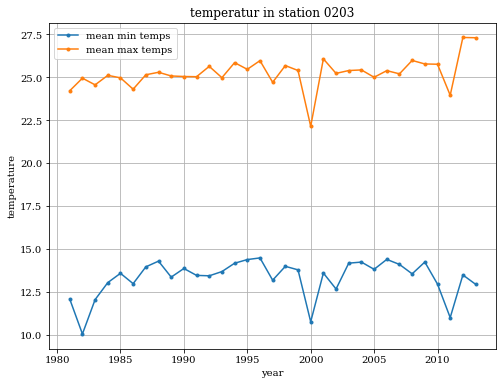

In [21]:
data_path = os.path.join(dir, "byStation","0203")
test = pd.read_fwf(data_path,skiprows=1,skipfooter=0,colspecs=byStation_specs, \
                                   names=byStation_cols)
create_plot_byStation(test , 203, 1980 , 2020)

In [47]:
def plot_and_save_for_station_data(dir_path, start_year, end_year):
    data_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
    #READ DATA
    plot_dir_path = os.path.join(dir_path,"plotEarliest{}Latest{}".format(start_year, end_year))
    isExist = os.path.exists(plot_dir_path)
    if not isExist:
        os.makedirs(plot_dir_path)
    for file in data_files:
        data_path = os.path.join(dir_path,file)
        plot_path = os.path.join(plot_dir_path,"{}.png".format(file))
        data =  pd.read_fwf(data_path,skiprows=1,skipfooter=0,colspecs=byStation_specs, \
                                       names=byStation_cols)
        plot = create_plot_byStation(data,int(file), start_year, end_year)
        plot.figure.savefig(plot_path)

In [56]:
def plot_and_save(dir_path,start_year, end_year ):
    data_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
    #READ DATA
    plot_dir_path = os.path.join(dir_path,"plotEarliest{}Latest{}".format(start_year, end_year))
    isExist = os.path.exists(plot_dir_path)
    if not isExist:
        os.makedirs(plot_dir_path)
    for file in data_files:
        data_path = os.path.join(dir_path,file)
        plot_path = os.path.join(plot_dir_path,"{}.png".format(file))
        data =  pd.read_fwf(data_path,skiprows=1,skipfooter=0,colspecs=byDistrict_specs, \
                                       names=byDistrict_cols)
        plot = create_plot(data,file, start_year, end_year)
        plot.figure.savefig(plot_path)

C:\Users\student\AppData\Local\Temp\ipykernel_2712\429438372.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize=(8,6))


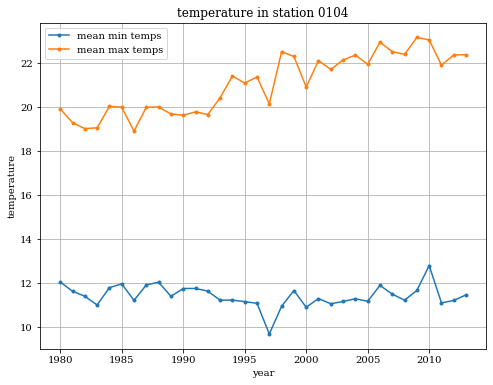

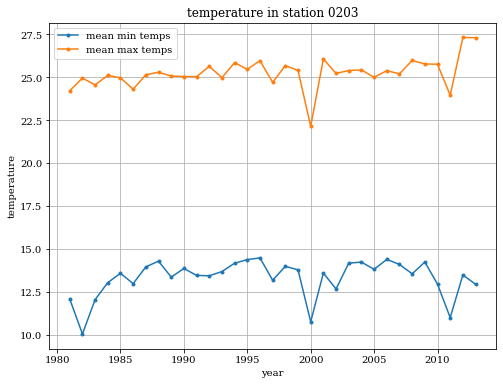

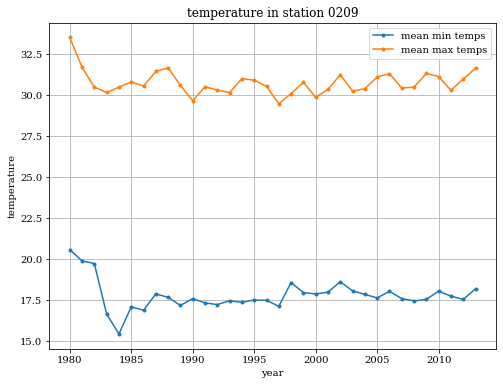

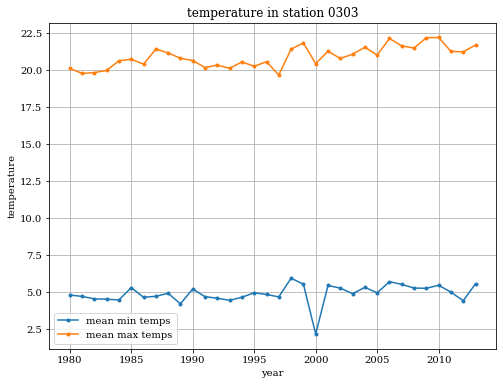

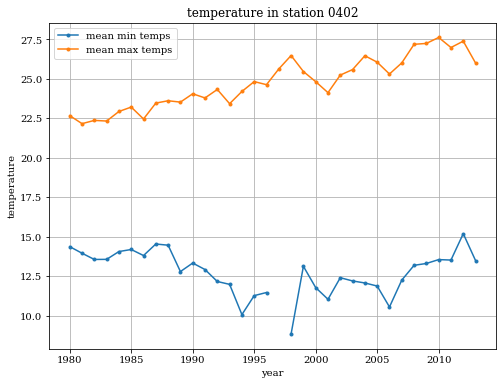

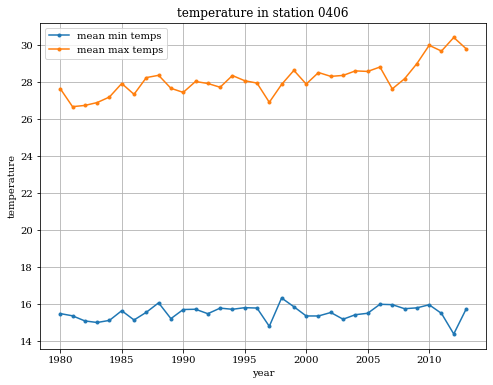

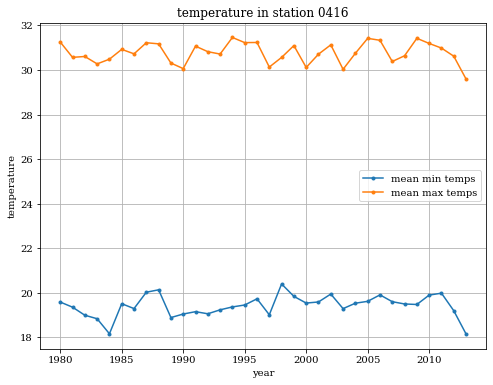

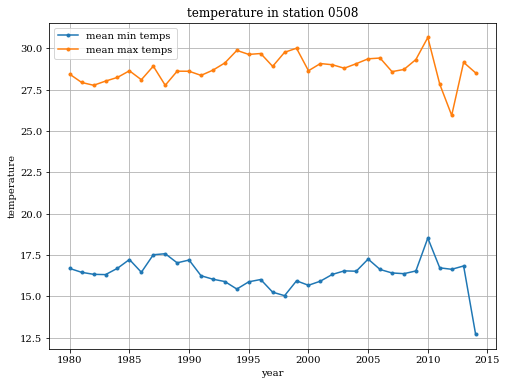

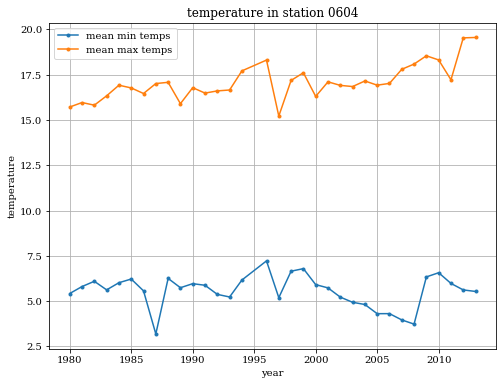

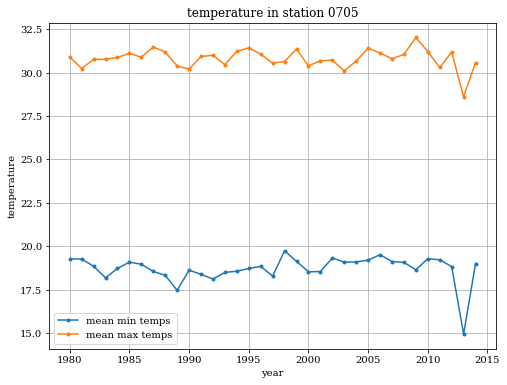

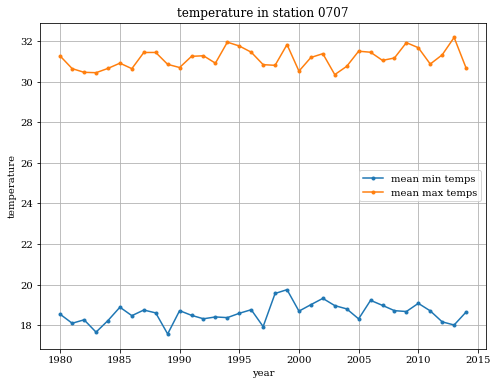

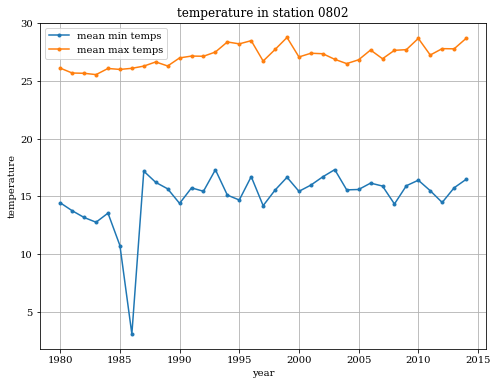

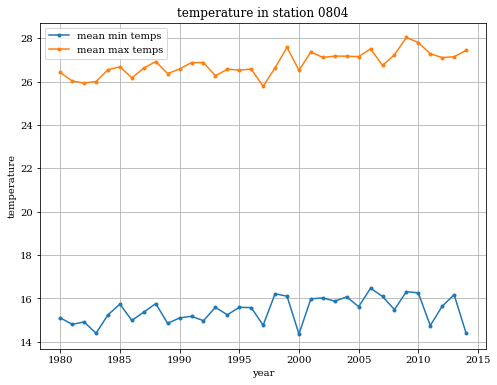

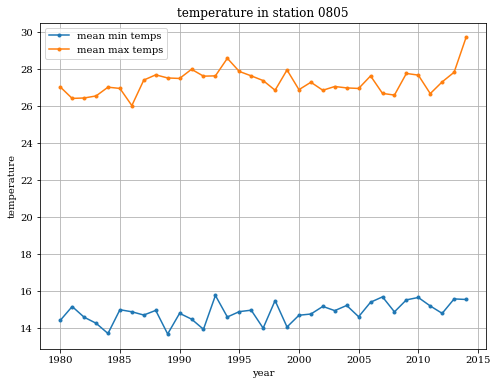

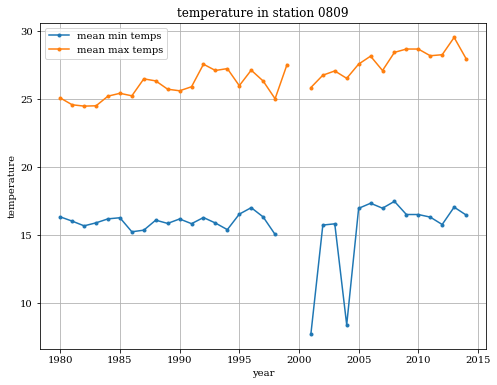

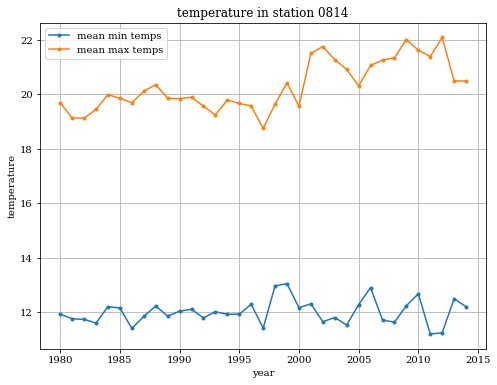

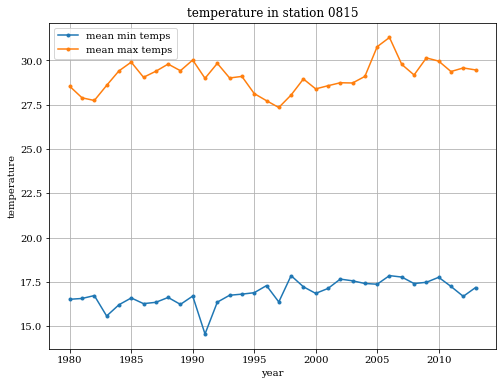

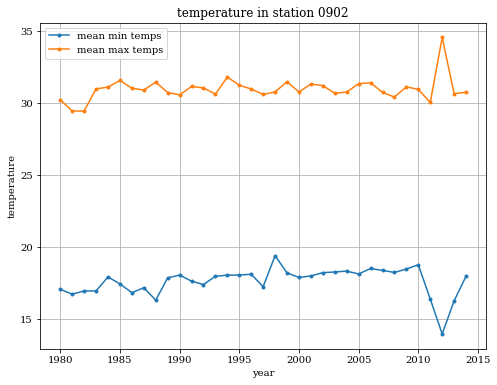

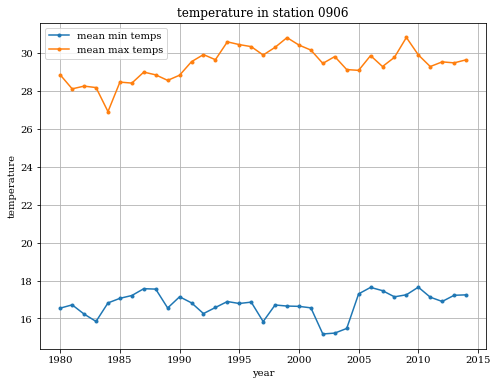

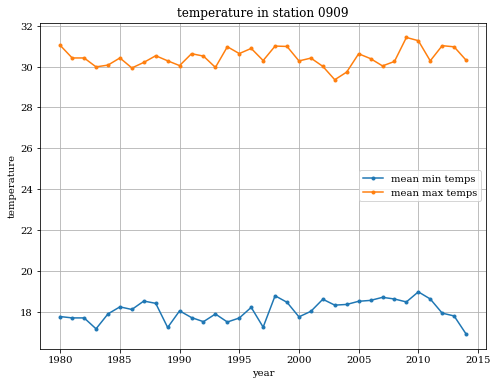

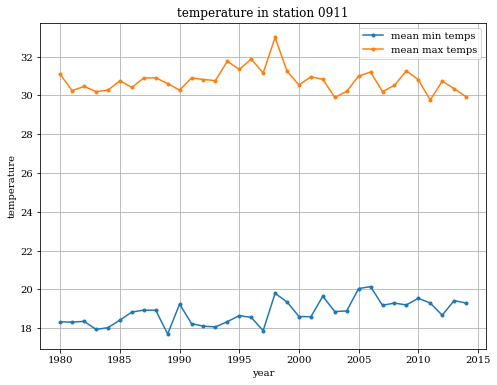

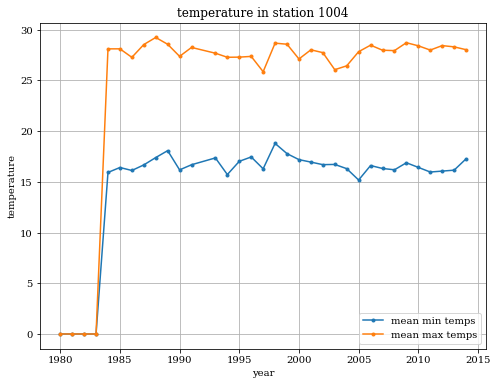

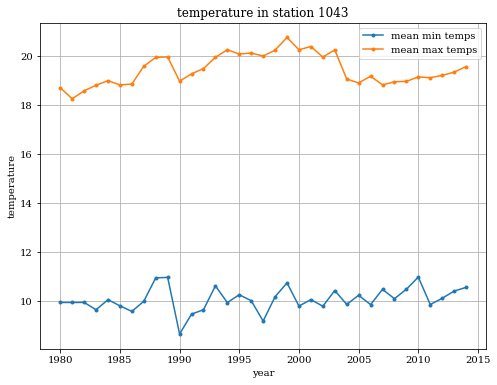

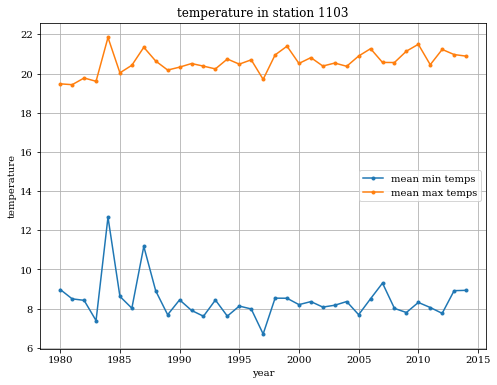

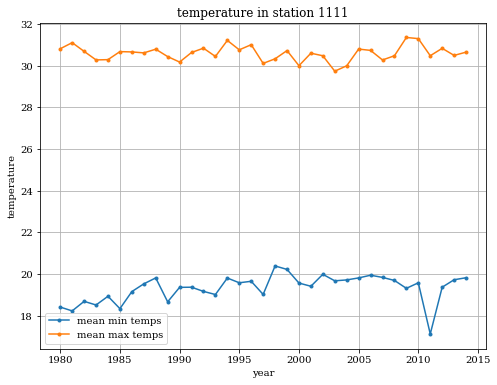

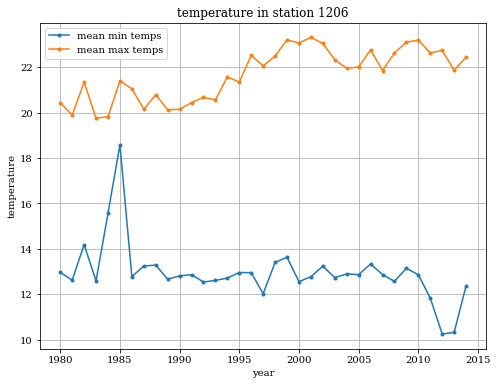

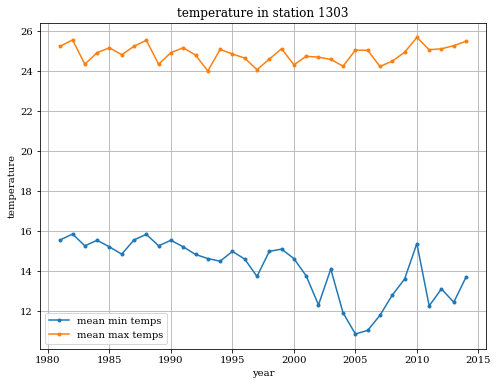

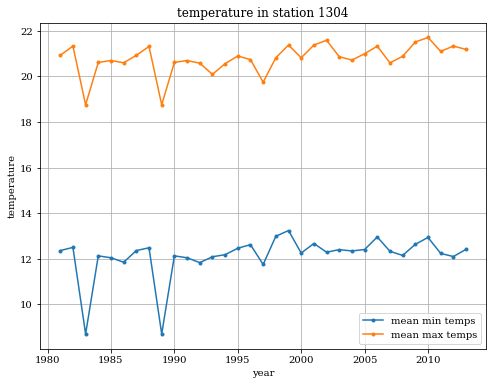

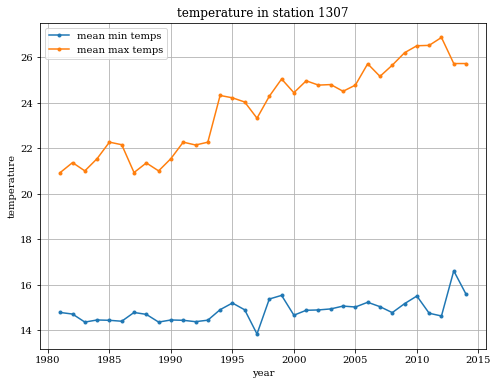

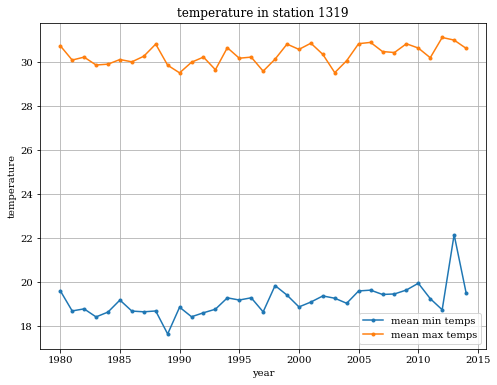

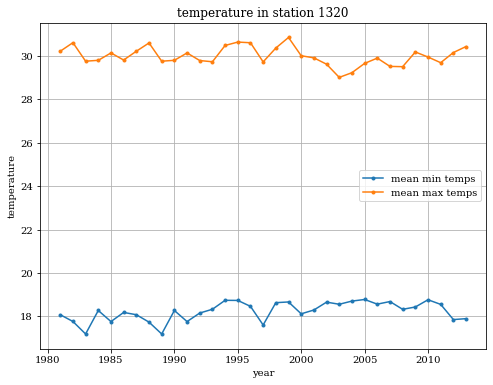

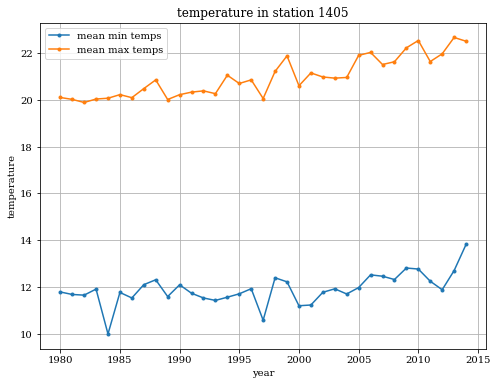

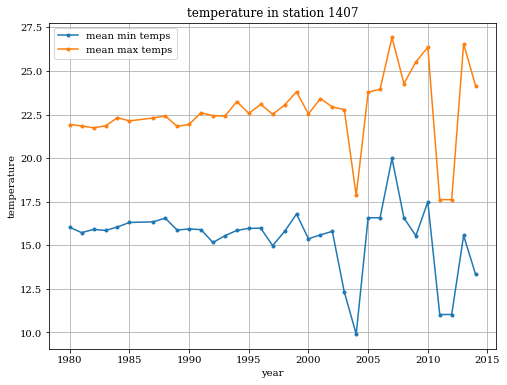

In [59]:
plot_and_save_for_station_data(dir_path = byStation_path ,start_year=1980, end_year=2020)

C:\Users\student\AppData\Local\Temp\ipykernel_2712\429438372.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize=(8,6))


<Figure size 576x432 with 0 Axes>

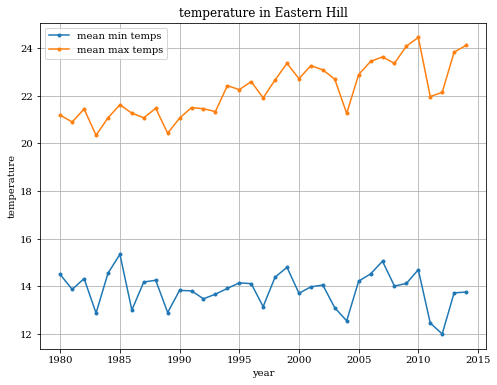

<Figure size 576x432 with 0 Axes>

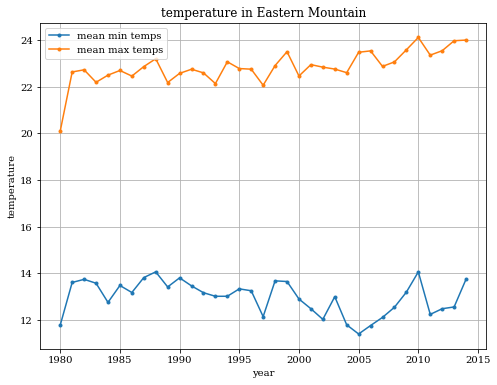

<Figure size 576x432 with 0 Axes>

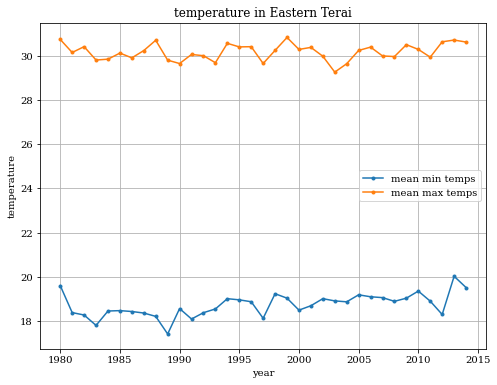

<Figure size 576x432 with 0 Axes>

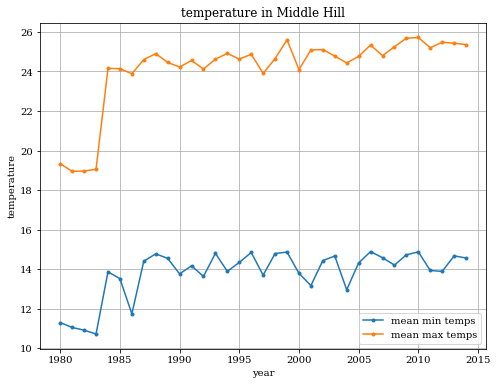

<Figure size 576x432 with 0 Axes>

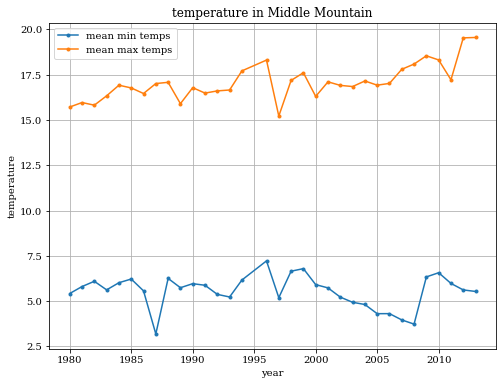

<Figure size 576x432 with 0 Axes>

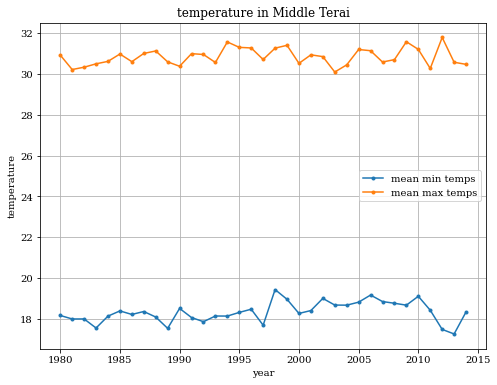

<Figure size 576x432 with 0 Axes>

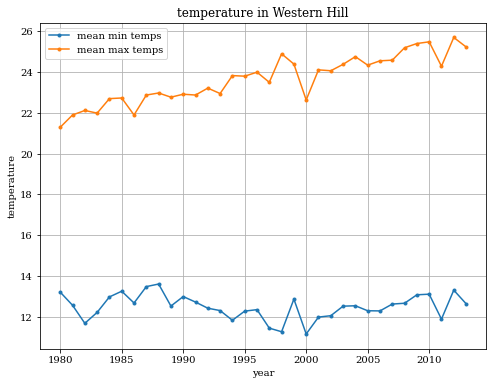

<Figure size 576x432 with 0 Axes>

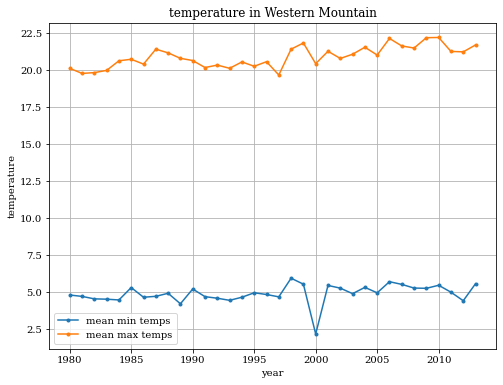

<Figure size 576x432 with 0 Axes>

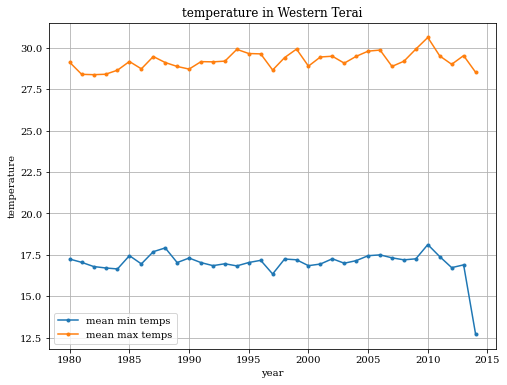

<Figure size 576x432 with 0 Axes>

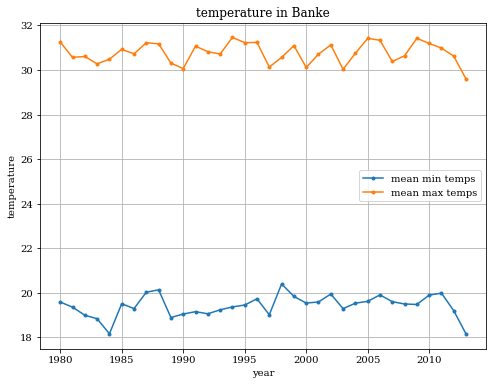

<Figure size 576x432 with 0 Axes>

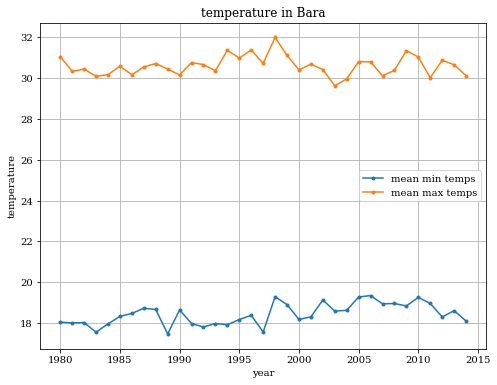

<Figure size 576x432 with 0 Axes>

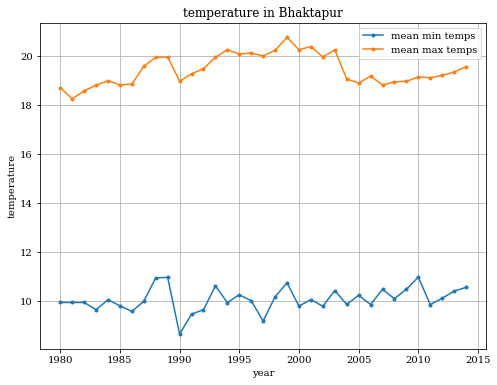

<Figure size 576x432 with 0 Axes>

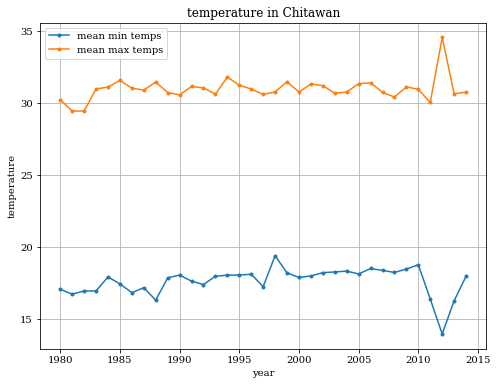

<Figure size 576x432 with 0 Axes>

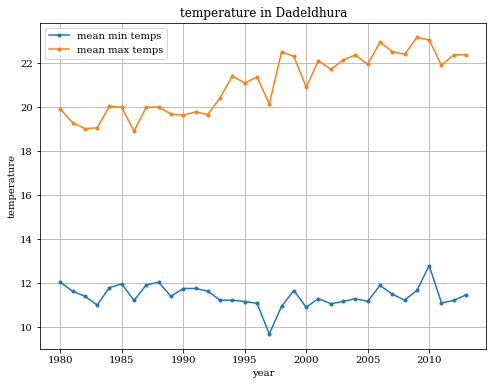

<Figure size 576x432 with 0 Axes>

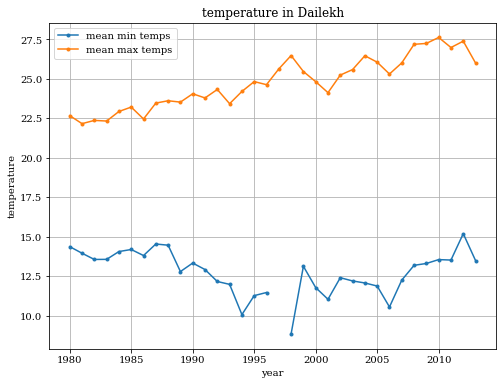

<Figure size 576x432 with 0 Axes>

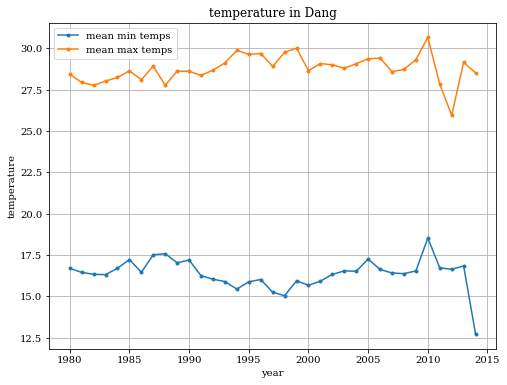

<Figure size 576x432 with 0 Axes>

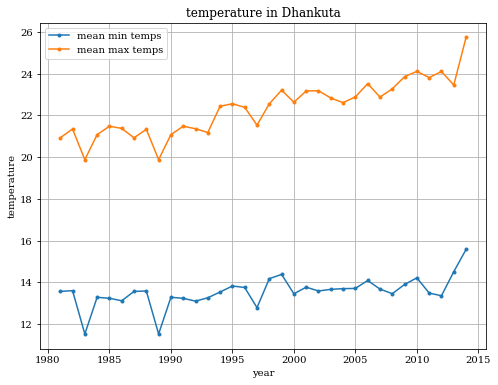

<Figure size 576x432 with 0 Axes>

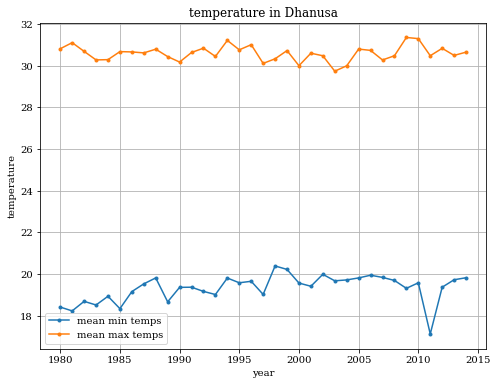

<Figure size 576x432 with 0 Axes>

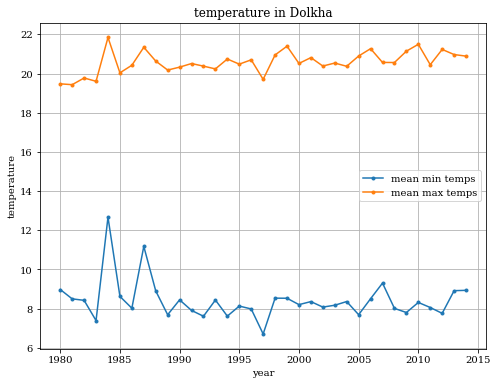

<Figure size 576x432 with 0 Axes>

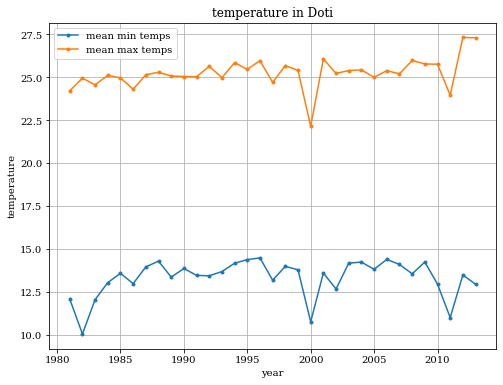

<Figure size 576x432 with 0 Axes>

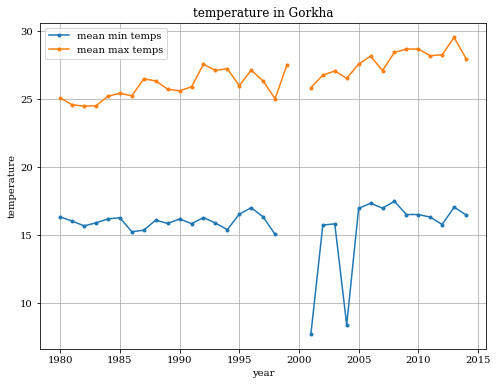

<Figure size 576x432 with 0 Axes>

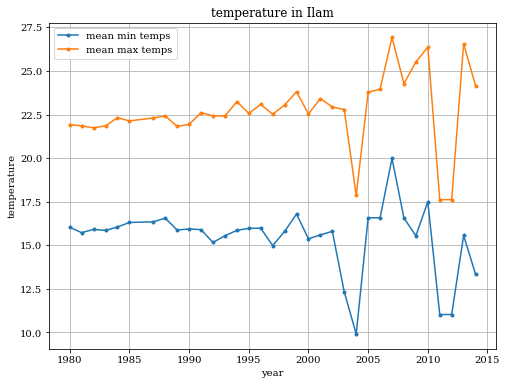

<Figure size 576x432 with 0 Axes>

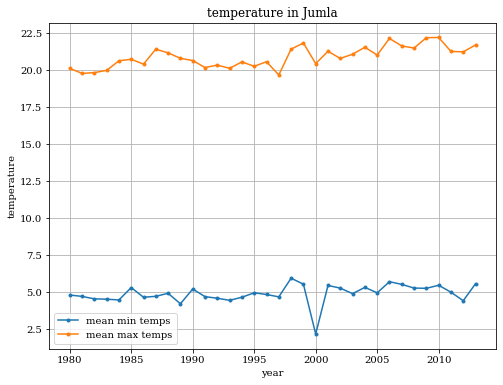

<Figure size 576x432 with 0 Axes>

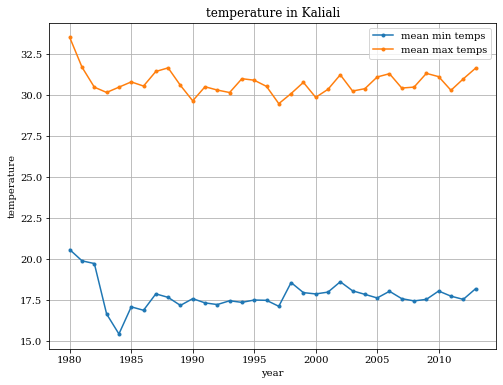

<Figure size 576x432 with 0 Axes>

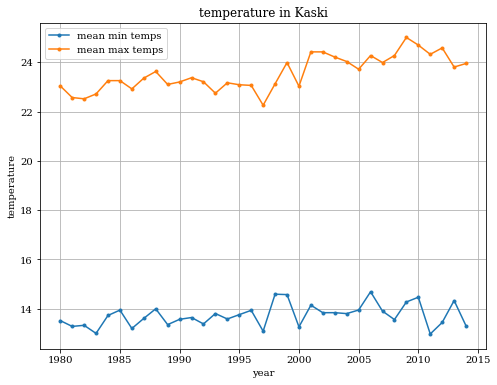

<Figure size 576x432 with 0 Axes>

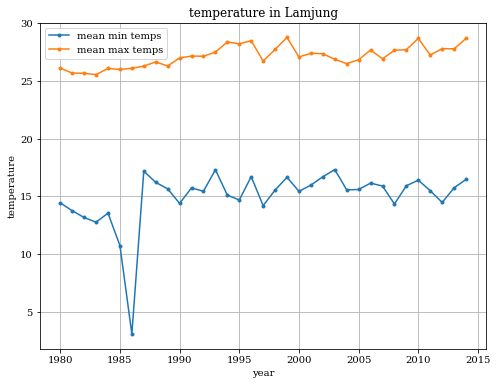

<Figure size 576x432 with 0 Axes>

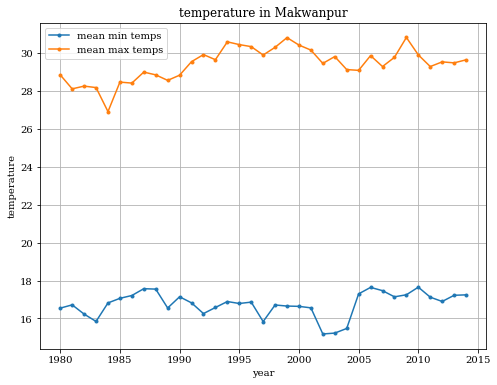

<Figure size 576x432 with 0 Axes>

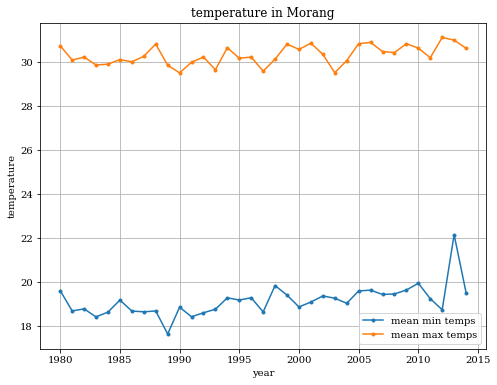

<Figure size 576x432 with 0 Axes>

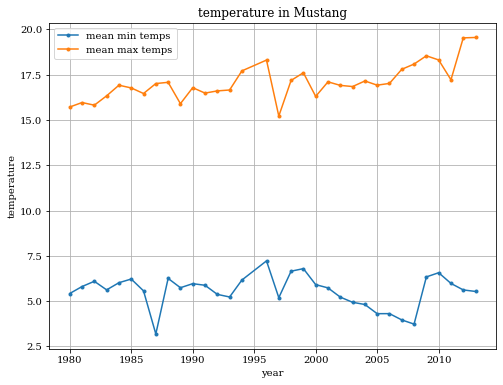

<Figure size 576x432 with 0 Axes>

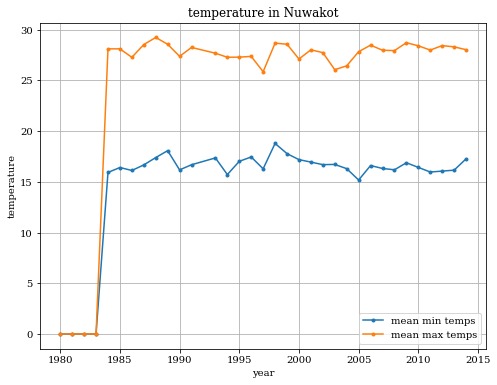

<Figure size 576x432 with 0 Axes>

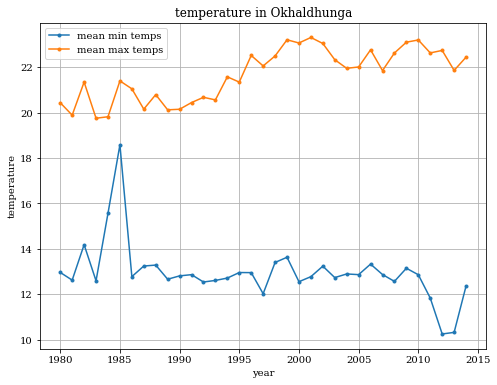

<Figure size 576x432 with 0 Axes>

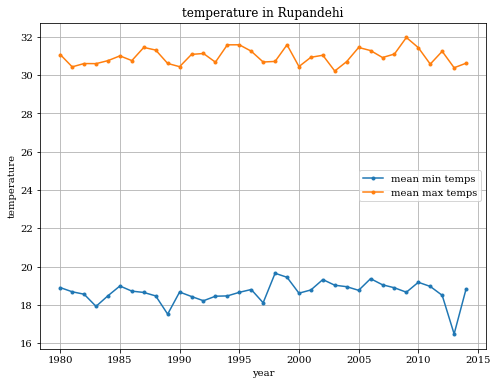

<Figure size 576x432 with 0 Axes>

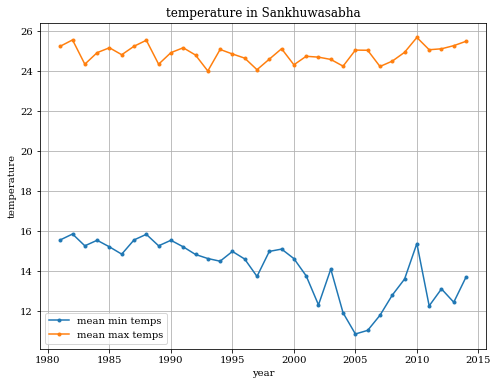

<Figure size 576x432 with 0 Axes>

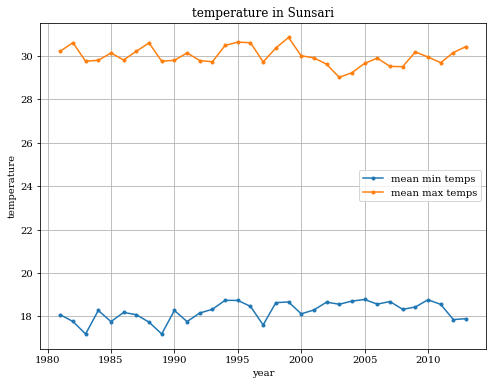

<Figure size 576x432 with 0 Axes>

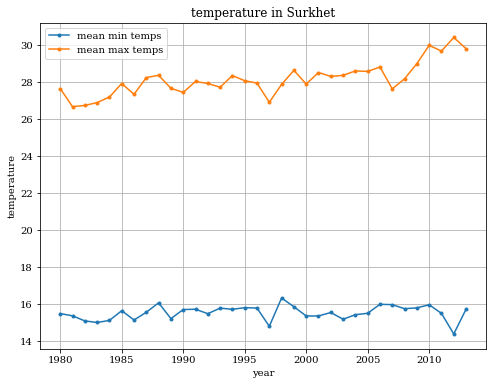

<Figure size 576x432 with 0 Axes>

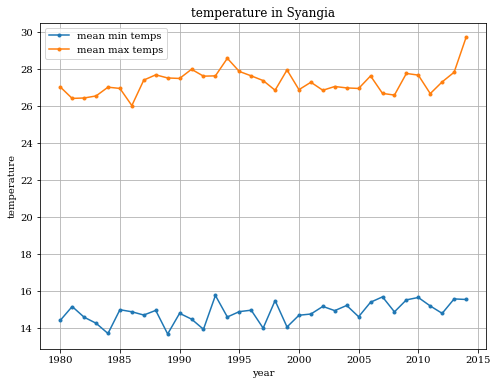

<Figure size 576x432 with 0 Axes>

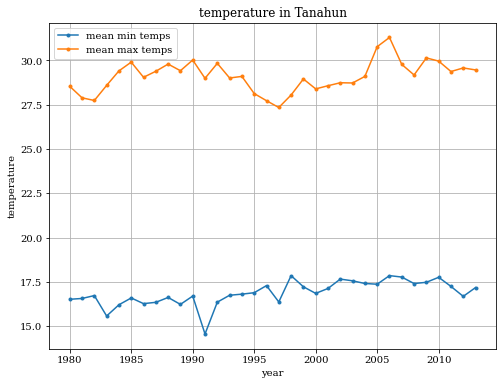

<Figure size 576x432 with 0 Axes>

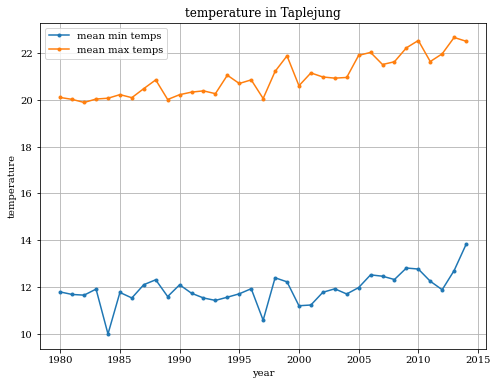

<Figure size 576x432 with 0 Axes>

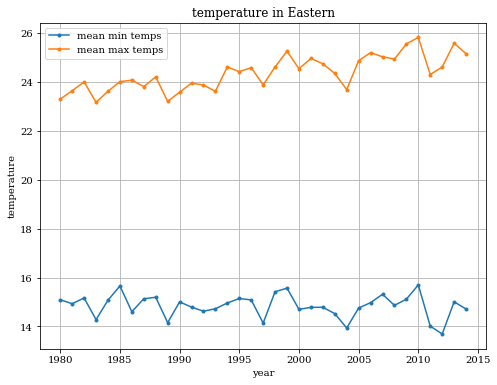

<Figure size 576x432 with 0 Axes>

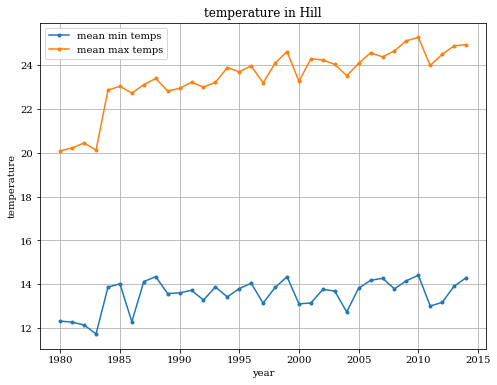

<Figure size 576x432 with 0 Axes>

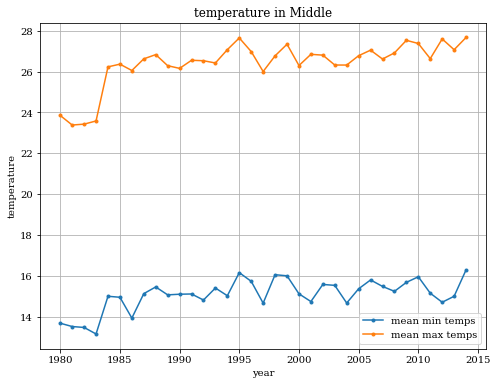

<Figure size 576x432 with 0 Axes>

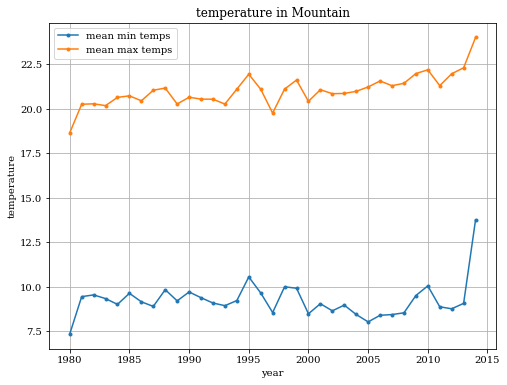

<Figure size 576x432 with 0 Axes>

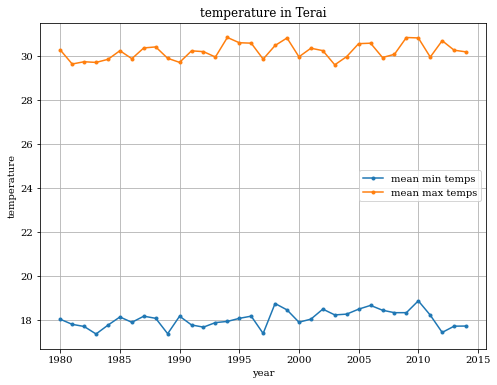

<Figure size 576x432 with 0 Axes>

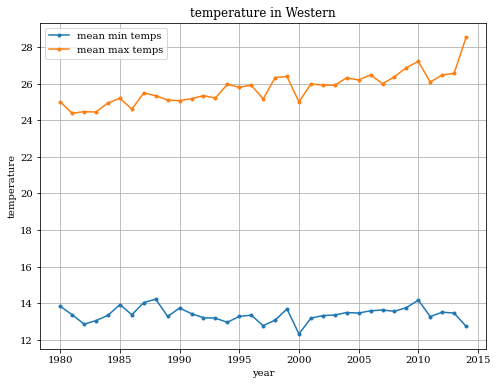

<Figure size 576x432 with 0 Axes>

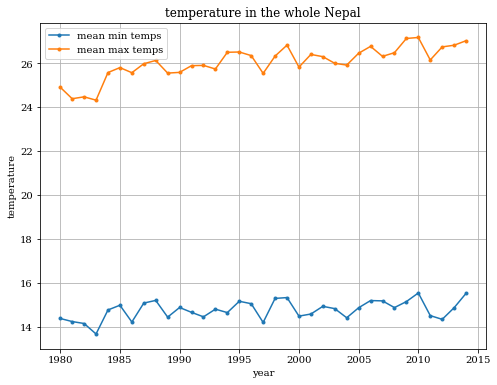

In [60]:
paths = [byRegion_path, byDistrict_path, bySubregion_path]
for path in paths:
    plot_and_save(path,start_year=1980, end_year=2020)